<a href="https://colab.research.google.com/github/jongjong2323/colab01/blob/main/%ED%95%A9%EC%84%B1%EA%B3%B1_%EC%8B%A0%EA%B2%BD%EB%A7%9D(CNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#합성곱 신경망(CNN)
합성곱층과 풀링층에서 사용하는 'im2col','col2im' 알고리즘.
im2col은 image to columns의 약어로 이미지를 행렬로 변환.
col2im은 columns to images의 약어로 행렬을 이미지로 변환.

In [ ]:
#im2col의 함수
import numpy as np

def im2col(img, flt_h, flt_w):  #입력이미지, 필터 높이, 폭

  img_h, img_w = img.shape  #입력이미지의 높이, 폭
  out_h = img_h - flt_h + 1  #출력이미지의 높이(패딩 없음, 스트라이드1)

  out_w = img_w - flt_w + 1  #출력이미지의 폭(패딩없음, 스트라이드1)

  cols = np.zeros((flt_h*flt_w, out_h*out_w))  #생성되는 행렬의 크기

  for h in range(out_h):
    h_lim = h + flt_h  #h:필터가 걸리는 영역 위쪽 끝, h_lim:필터가 걸리는 영역의 아래쪽 끝

    for w in range(out_w):
      w_lim = w + flt_w  #w:필터가 걸리는 영역의 왼쪽 끝, w_lim:필터가 걸리는 영역의 오른쪽 끝
      cols[:,h*out_w+w] = img[h:h_lim, w:w_lim].reshape(-1)

  return cols

In [ ]:
#im2col 함수를 사용
img = np.array([[1,2,3,4], #입력이미지
                [5,6,7,8],
                [9,10,11,12],
                [13,14,15,16]])

cols = im2col(img, 2, 2)  #입력이미지와 필터의 높이, 폭을 전달한다
print(cols)

[[ 1.  2.  3.  5.  6.  7.  9. 10. 11.]
 [ 2.  3.  4.  6.  7.  8. 10. 11. 12.]
 [ 5.  6.  7.  9. 10. 11. 13. 14. 15.]
 [ 6.  7.  8. 10. 11. 12. 14. 15. 16.]]


In [ ]:
#배치 크기, 채널 수, 패딩 폭, 스트라이드에 대응한 im2col 함수
def im2col(images, flt_h, flt_w, stride, pad):

  n_bt, n_ch, img_h, img_w = images.shape
  out_h = (img_h - flt_h + 2*pad) // stride + 1  #출력이미지의 높이
  out_w = (img_w - flt_w + 2*pad) // stride + 1  #출력이미지의 폭

  img_pad = np.pad(images, [(0,0),(0,0),(pad,pad),(pad,pad)], 'constant')
  cols = np.zeros((n_bt, n_ch, flt_h, flt_w, out_h, out_w))

  for h in range(flt_h):
    h_lim = h + stride*out_h
    for w in range(flt_w):
      w_lim = w + stride*out_w
      cols[:,:,h,w,:,:] = img_pad[:,:,h:h_lim:stride, w:w_lim:stride]

  cols = cols.transpose(1,2,3,0,4,5).reshape(n_ch * flt_h*flt_w, n_bt*out_h*out_w)
  return cols

In [ ]:
#배치 크기, 채널 수, 스트라이드에 대응한 im2col 함수를 사용
img = np.array([[[[1,2,3,4], #입력이미지
                [5,6,7,8],
                [9,10,11,12],
                [13,14,15,16]]]])

cols = im2col(img, 2, 2, 1, 0)  #입력이미지, 필터의 높이, 폭, 스트라이드, 패딩 폭
print(cols)

[[ 1.  2.  3.  5.  6.  7.  9. 10. 11.]
 [ 2.  3.  4.  6.  7.  8. 10. 11. 12.]
 [ 5.  6.  7.  9. 10. 11. 13. 14. 15.]
 [ 6.  7.  8. 10. 11. 12. 14. 15. 16.]]


#합성곱 구현
scikit-learn으로 부터 8x8, 손으로 쓴 흑백 문자 이미지를 읽어 들이고 합성곱을 실시합니다

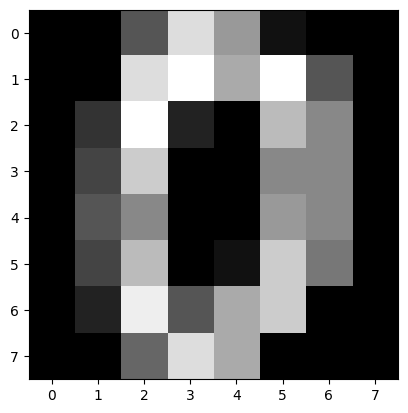

In [ ]:
import matplotlib.pyplot as plt
from sklearn import datasets

digits = datasets.load_digits()

image = digits.data[0].reshape(8,8)
plt.imshow(image, cmap='gray')  #최초의 손으로 쓴 문자 이미지를 표시
plt.show()

In [ ]:
#간단한 im2col 함수
def im2col(img, flt_h, flt_w, out_h, out_w):  #입력 이미지,필터의 높이, 폭, 출력 이미지의 높이, 폭

  cols = np.zeros((flt_h*flt_w, out_h*out_w))  #생성되는 행렬의 크기

  for h in range(out_h):
    h_lim = h + flt_h  #h:필터가 걸리는 영역의 위쪽 끝, h_lim:필터가 걸리는 영역의 아래쪽 끝
    for w in range(out_w):
      w_lim = w + flt_w  #w:필터가 걸리는 영역의 왼쪽 끝, w_lim:틸터가 걸리는 영역의 오른쪽 끝
      cols[:, h*out_w+w] = img[h:h_lim, w:w_lim].reshape(-1)

  return cols


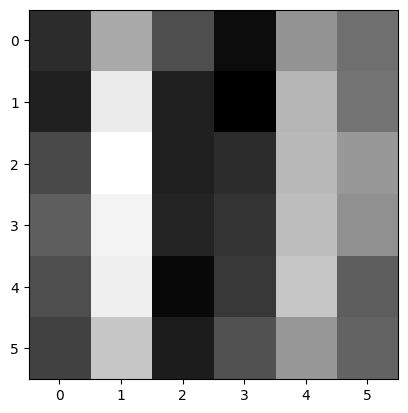

In [ ]:
#im2col과 합성곱의 구현
flt = np.array([[-1,1,-1,],  #세로 선을 강조하는 필터
                [-1,1,-1,],
                [-1,1,-1]])
flt_h, flt_w = flt.shape
flt = flt.reshape(-1)  #행 수가 1인 행렬

img_h, img_w = image.shape  #입력 이미지의 높이, 폭
out_h = img_h - flt_h + 1  #출력 이미지의 높이(패딩 없음, 스트라이드1)
out_w = img_w - flt_w + 1  #출력 이미지의 폭(패딩 없음, 스트라이드1)
cols = im2col(image, flt_h, flt_w, out_h, out_w)

image_out = np.dot(flt, cols)  #합성곱
image_out = image_out.reshape(out_h, out_w)
plt.imshow(image_out, cmap='gray')
plt.show()

#풀링의 구현
풀링은 2차원 데이터의 세로 및 가로 방향의 공간을 줄이는 연산

(1797, 64)


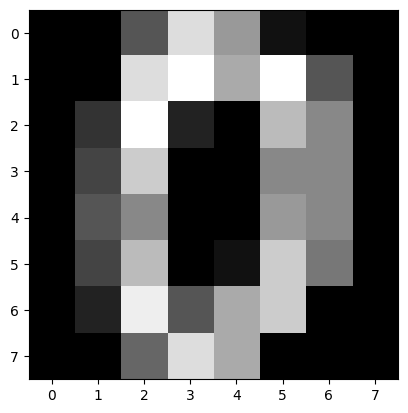

In [ ]:
#손으로 쓴 문자 이미지 읽어 들이기와 표시
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

digits = datasets.load_digits()
print(digits.data.shape)

image = digits.data[0].reshape(8,8)
plt.imshow(image, cmap='gray')
plt.show()

In [ ]:
#im2col 함수의 정의
def im2col(img, flt_h, flt_w, out_h, out_w, stride):  #입력 이미지, 풀링 영역의 높이, 폭, 출력 이미지의 높이, 폭, 스트라이드
  cols = np.zeros((flt_h*flt_w, out_h*out_w))  #생성되는 행렬의 크기
  for h in range(out_h):
    h_lim = stride*h + flt_h  #h:풀링 영역의 위쪽 끝, h_lim:풀링 영역의 아래쪽 끝
    for w in range(out_w):
      w_lim = stride*w + flt_w  #w:풀링 영역의 왼쪽 끝, w_lim: 풀링 영역의 오른쪽 끝
      cols[:, h*out_w+w] = img[stride*h:h_lim, stride*w:w_lim].reshape(-1)

  return cols

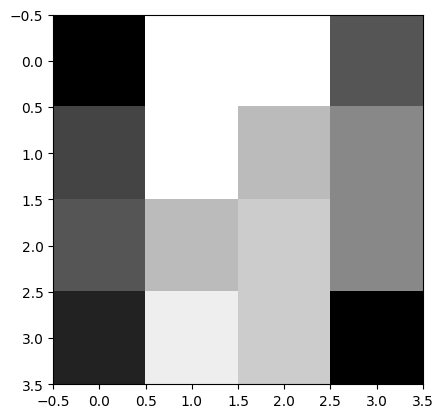

In [ ]:
#im2col과 풀링
img_h, img_w = image.shape  #입력 이미지의 높이, 폭
pool = 2  #풀링 영역의 크기

out_h = img_h//pool  #출력 이미지의 높이
out_w = img_w//pool  #출력 이미지의 폭

cols = im2col(image, pool, pool, out_h, out_w, pool)  #스트라이드 크기를 풀링 영역의 크기와 같게
image_out = np.max(cols, axis=0)  #각 열의 최댓값을 취득(Max 풀링)
image_out = image_out.reshape(out_h,out_w)  #출력의 형태를 갖춘다
plt.imshow(image_out, cmap='gray')
plt.show()

#CNN의 구현
Keras를 사용해 CIFAR-10을 읽어 들입니다. CIFAR-10은 약 6만 장의 이미지에 라벨을 붙인 데이터셋이다.

170498071/170498071 [==============================] - 2s 0us/step
Image size: (32, 32, 3)


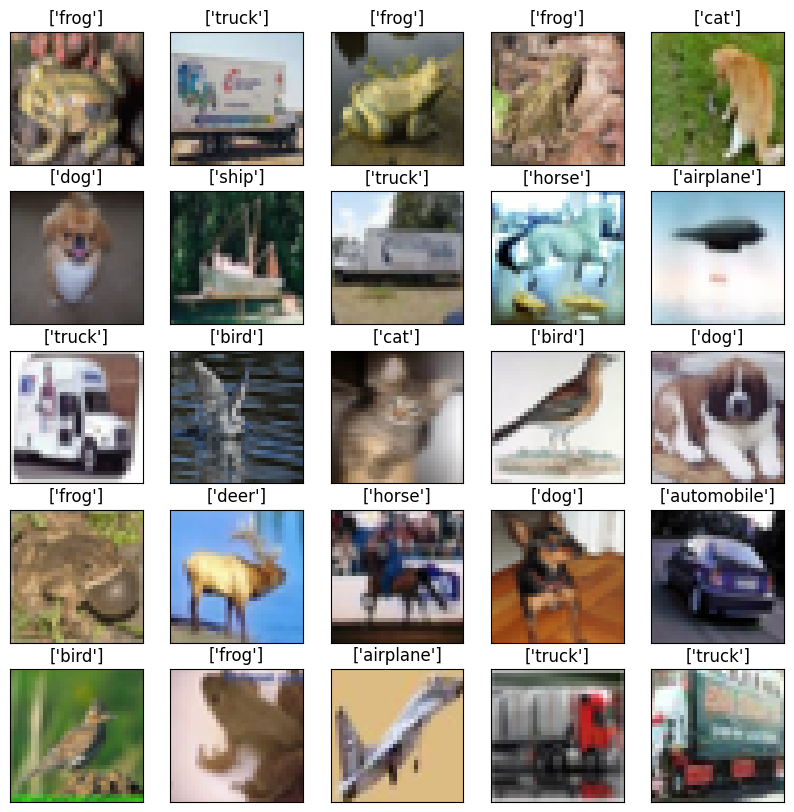

In [ ]:
#CIFAR-10 읽어 들이기와 일부 표시
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import cifar10

(x_train, t_train), (x_test, t_test) = cifar10.load_data()
print('Image size:', x_train[0].shape)

cifar10_labels = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])

n_image = 25  #이미지 표시 수
rand_idx = np.random.randint(0, len(x_train), n_image)

plt.figure(figsize=(10,10))  #표시 영역의 크기
for i in range(n_image):
  cifar_img=plt.subplot(5,5,i+1)
  plt.imshow(x_train[rand_idx[i]])
  label = cifar10_labels[t_train[rand_idx[i]]]
  plt.title(label)
  plt.tick_params(labelbottom=False, labelleft=False, bottom=False, left=False)   #라벨과 메모리를 비표시로

plt.show()

In [ ]:
#CNN의 각 설정
batch_size = 32  #배치크기
epochs = 20  #에포크 수
n_class = 10  #10의 클래스 분류

#ont-hot 표현으로 변환
t_train = tf.keras.utils.to_categorical(t_train, n_class)  #one-hot 표현으로 변환
t_test = tf.keras.utils.to_categorical(t_test, n_class)
print(t_train[:10])

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


In [ ]:
#CNN의 모델을 구축한다
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam

model = Sequential()

model.add(Conv2D(32,(3,3), padding='same', input_shape=x_train.shape[1:]))  #배치 크기 이외의 입력 이미지의 형태를 지정
model.add(Activation('relu'))
model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3), padding='same'))  #배치 크기 이외의 입력 이미지의 형태를 지정
model.add(Activation('relu'))
model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())  #1차원 배열로 변환
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))  #드롭 아웃
model.add(Dense(n_class))
model.add(Activation('softmax'))

#최적화 알고리즘에 Adam, 손실 함수에 교차 엔트로피를 지정해서 컴파일
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 15, 15, 64)        18496     
                                                        

In [ ]:
#CNN 모델을 훈련한다
x_train = x_train / 255   #0에서 1의 범위에 넣는다
x_test = x_test / 255

#훈련 데이터를 사용해 모델을 훈련한다
history = model.fit(x_train, t_train, epochs=epochs, batch_size = batch_size, validation_data = (x_test, t_test))

Epoch 1/20
1563/1563 [==============================] - 21s 6ms/step - loss: 1.4655 - accuracy: 0.4705 - val_loss: 1.0970 - val_accuracy: 0.6138
Epoch 2/20
1563/1563 [==============================] - 9s 6ms/step - loss: 1.0516 - accuracy: 0.6323 - val_loss: 0.9480 - val_accuracy: 0.6722
Epoch 3/20
1563/1563 [==============================] - 10s 6ms/step - loss: 0.8936 - accuracy: 0.6862 - val_loss: 0.8426 - val_accuracy: 0.7112
Epoch 4/20
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7895 - accuracy: 0.7230 - val_loss: 0.7851 - val_accuracy: 0.7242
Epoch 5/20
1563/1563 [==============================] - 9s 5ms/step - loss: 0.7158 - accuracy: 0.7517 - val_loss: 0.7284 - val_accuracy: 0.7511
Epoch 6/20
1563/1563 [==============================] - 9s 6ms/step - loss: 0.6498 - accuracy: 0.7737 - val_loss: 0.7085 - val_accuracy: 0.7575
Epoch 7/20
1563/1563 [==============================] - 9s 6ms/step - loss: 0.5956 - accuracy: 0.7903 - val_loss: 0.7160 - val_accurac

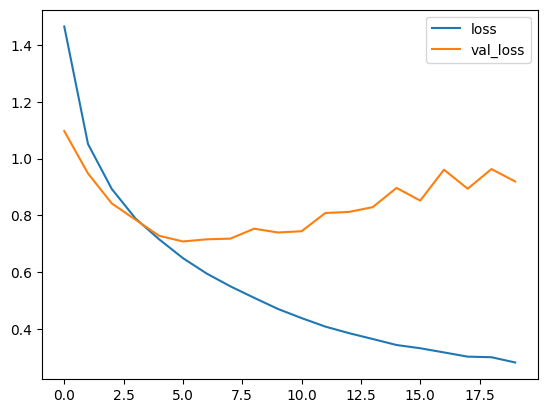

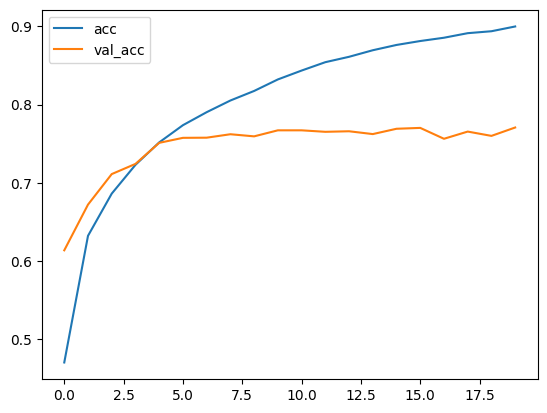

In [ ]:
#학습의 추이
import matplotlib.pyplot as plt

train_loss = history.history['loss']  #훈련 데이터의 오차
train_acc = history.history['accuracy']  #훈련 데이터의 정밀도
val_loss = history.history['val_loss']  #검증용 데이터의 오차
val_acc = history.history['val_accuracy']  #검증용 데이터의 정밀도

#오차 표시
plt.plot(np.arange(len(train_loss)), train_loss, label='loss')
plt.plot(np.arange(len(val_loss)), val_loss, label='val_loss')
plt.legend()
plt.show()

#정밀도 표시
plt.plot(np.arange(len(train_acc)), train_acc, label='acc')
plt.plot(np.arange(len(val_acc)), val_acc, label='val_acc')
plt.legend()
plt.show()

#데이터 확장
Keras의 ImageDataGenerator() 함수를 사용해 데이터 확장을 한다. 여기에서는 CIFAR-10의 이미지에 회전을 더한 것을 몇 개 생성합니다.

170498071/170498071 [==============================] - 14s 0us/step


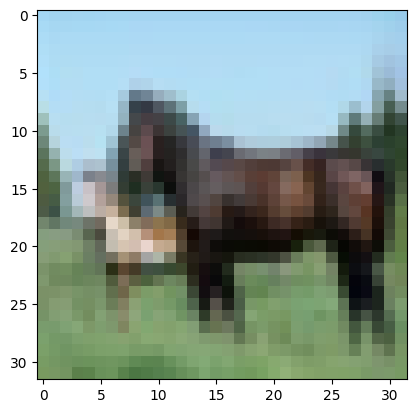

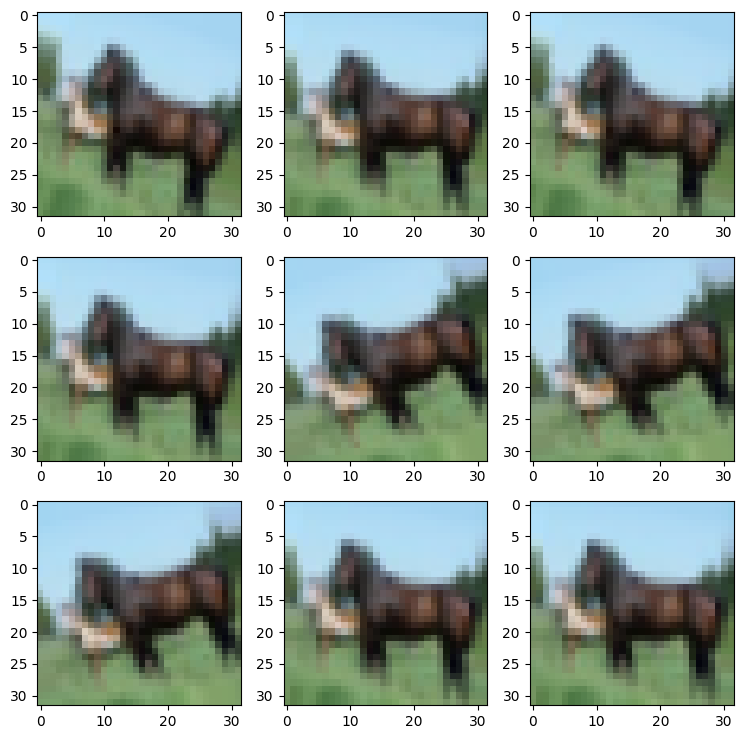

In [3]:
#데이터 확장 -회전-
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator

(x_train, t_train), (x_test,t_test) = cifar10.load_data()

cifar10_labels = np.array(['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck'])
image = x_train[12]
plt.imshow(image)
plt.show()

def show_images(image, generator):
  channel, height, width = image.shape
  image = image.reshape(1, channel, height, width)  #배치 대응
  gen = generator.flow(image, batch_size=1)  #변환된 이미지의 생성

  plt.figure(figsize=(9,9))
  for i in range(9):
    gen_img = gen.next()[0].astype(np.uint8)   #이미지 취득
    plt.subplot(3,3,i+1)
    plt.imshow(gen_img)
  plt.show()

#-20도 에서 20도 범위에서 랜덤으로 회전을 실시하는 이미지 생성기
generator = ImageDataGenerator(rotation_range=20)
show_images(image, generator)

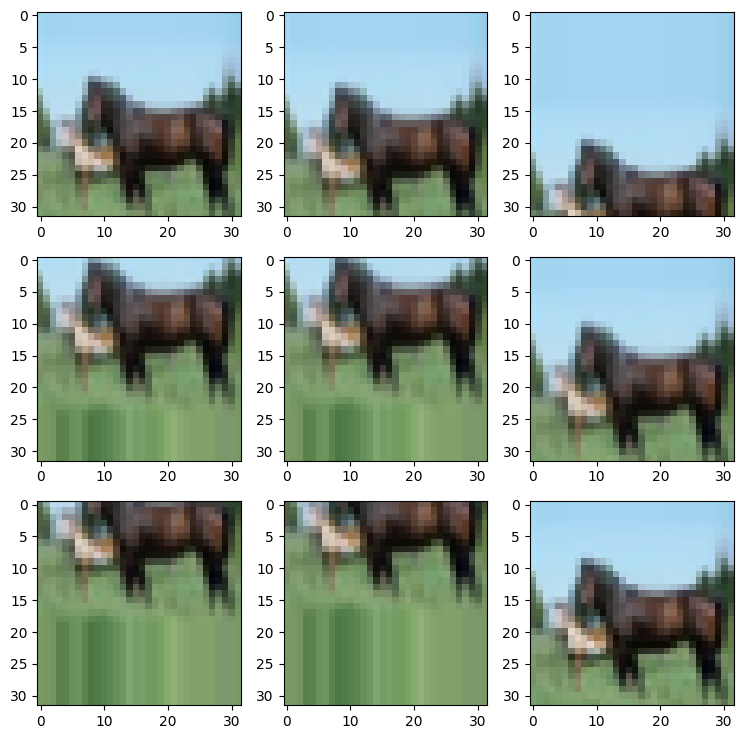

In [4]:
#데이터 확장 -수평 방향으로 시프트-
generator = ImageDataGenerator(width_shift_range=0.5)  #이미지 크기의 반의 범위에서 랜덤으로 시프트한다
show_images(image, generator)

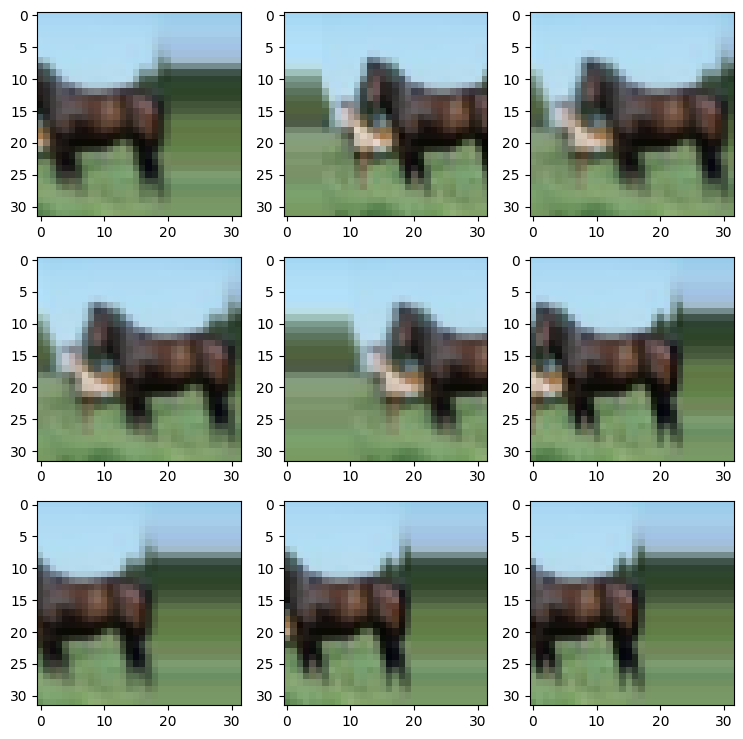

In [5]:
#데이터 확장 -수직 방향으로 시프트-
generator = ImageDataGenerator(height_shift_range=0.5)  #이미지 크기의 반의 범위에서 랜덤으로 시프트한다
show_images(image, generator)

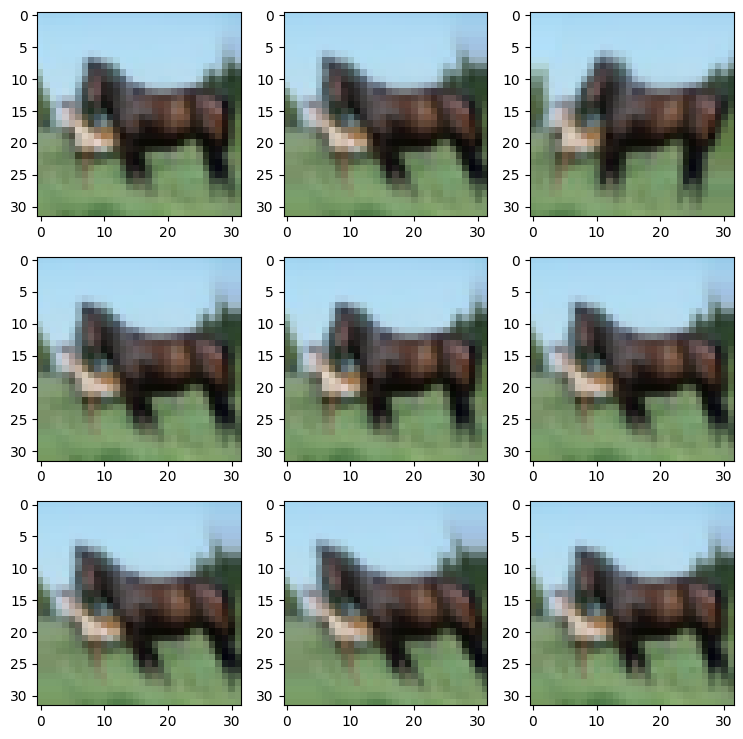

In [6]:
#데이터 확장 -시어 강도-
generator = ImageDataGenerator(shear_range=20)  #시어 강도의 범위를 지정
show_images(image, generator)

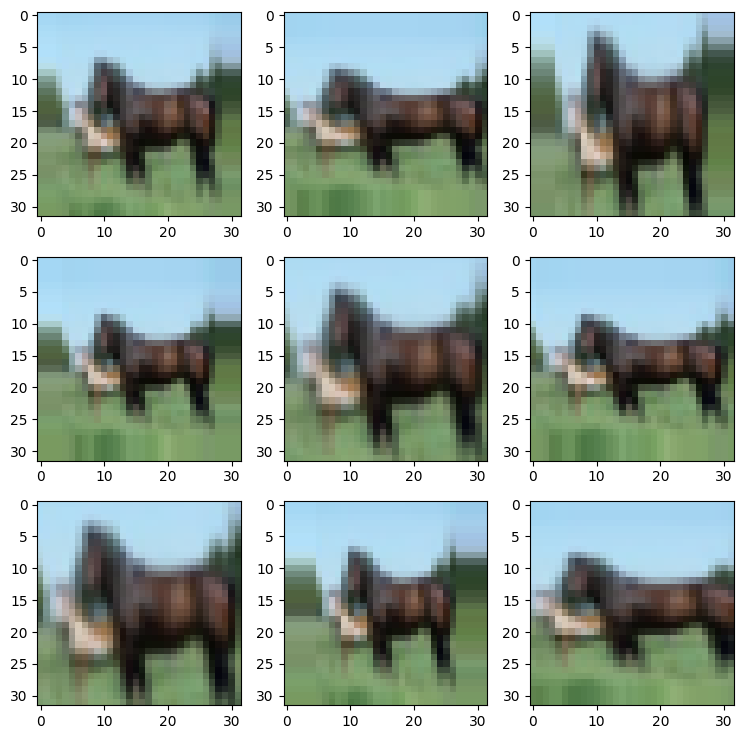

In [7]:
#데이터 확장 -확대 축소-
generator = ImageDataGenerator(zoom_range=0.4)  #확대 축소하는 범위를 지정
show_images(image, generator)

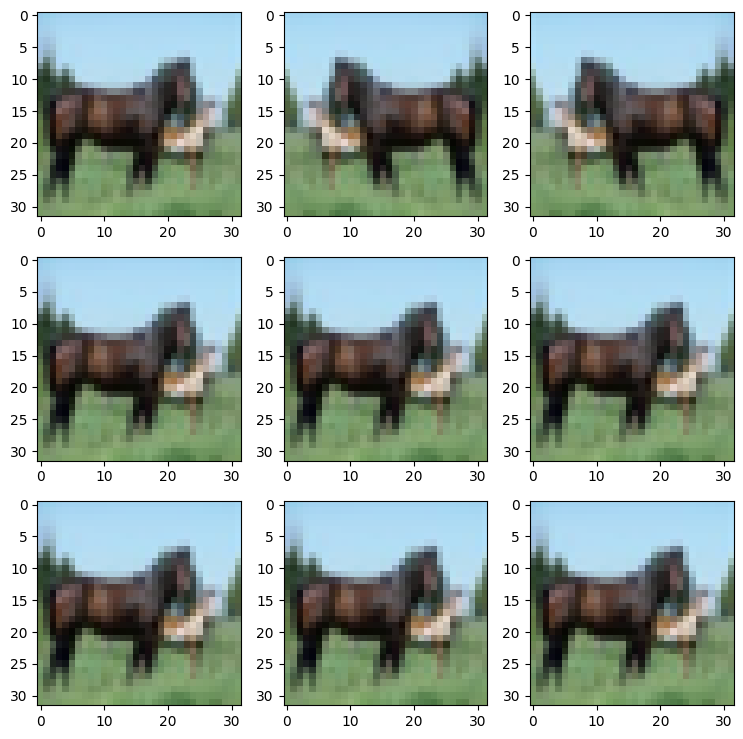

In [8]:
#데이터 확장 -랜덤으로 반전-
generator = ImageDataGenerator(horizontal_flip=True)  #수평, 수직 방향으로 랜덤으로 반전
show_images(image, generator)

In [9]:
#CNN 모델을 구축한다
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam

batch_size = 32
epochs = 20
n_class = 10

t_train = tf.keras.utils.to_categorical(t_train, n_class)   #one-hot 표현으로
t_test = tf.keras.utils.to_categorical(t_test, n_class)

model = Sequential()

model.add(Conv2D(32, (3,3), padding='same', input_shape = x_train.shape[1:]))  #제로 패딩, 배치 크기 이외의 이미지의 형태를 지정
model.add(Activation('relu'))
model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())  #1차원 배열로 변환
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))  #드롭아웃
model.add(Dense(n_class))
model.add(Activation('softmax'))

#최적화 알고리즘에 Adam, 손실함수에 교차 엔트로피를 지정해서 컴파일
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 15, 15, 64)        18496     
                                                        

In [10]:
#CNN 모델을 데이터 확장과 함께 훈련한다
x_train = x_train / 255  #0에서 1의 범위에 넣는다
x_test = x_test / 255

generator = ImageDataGenerator(
    rotation_range = 0.2,   #랜덤으로 회전
    horizontal_flip=True    #랜덤으로, 수평 방향으로 반전
    )
generator.fit(x_train)

history = model.fit(generator.flow(x_train, t_train, batch_size=batch_size), epochs=epochs, validation_data=(x_test, t_test))

Epoch 1/20
1563/1563 [==============================] - 46s 21ms/step - loss: 1.5317 - accuracy: 0.4406 - val_loss: 1.1172 - val_accuracy: 0.6025
Epoch 2/20
1563/1563 [==============================] - 34s 22ms/step - loss: 1.0690 - accuracy: 0.6250 - val_loss: 0.9390 - val_accuracy: 0.6687
Epoch 3/20
1563/1563 [==============================] - 33s 21ms/step - loss: 0.9066 - accuracy: 0.6862 - val_loss: 0.8031 - val_accuracy: 0.7143
Epoch 4/20
1563/1563 [==============================] - 33s 21ms/step - loss: 0.8137 - accuracy: 0.7185 - val_loss: 0.7717 - val_accuracy: 0.7320
Epoch 5/20
1563/1563 [==============================] - 32s 20ms/step - loss: 0.7537 - accuracy: 0.7389 - val_loss: 0.7286 - val_accuracy: 0.7479
Epoch 6/20
1563/1563 [==============================] - 33s 21ms/step - loss: 0.7134 - accuracy: 0.7499 - val_loss: 0.7066 - val_accuracy: 0.7569
Epoch 7/20
1563/1563 [==============================] - 32s 21ms/step - loss: 0.6771 - accuracy: 0.7646 - val_loss: 0.6716 -

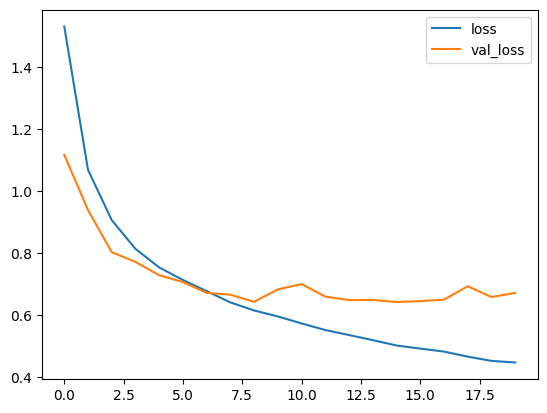

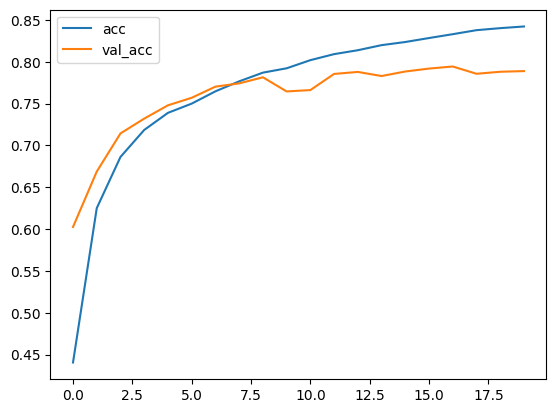

In [11]:
import matplotlib.pyplot as plt

train_loss = history.history['loss']  #훈련용 데이터 오차
train_acc = history.history['accuracy']  #훈련용 데이터의 정밀도
val_loss = history.history['val_loss']  #검증용 데이터의 오차
val_acc = history.history['val_accuracy']  #김증용 데이터의 정밀도

plt.plot(np.arange(len(train_loss)), train_loss, label='loss')
plt.plot(np.arange(len(val_loss)), val_loss, label='val_loss')
plt.legend()
plt.show()

plt.plot(np.arange(len(train_acc)), train_acc, label='acc')
plt.plot(np.arange(len(val_acc)), val_acc, label='val_acc')
plt.legend()
plt.show()

In [12]:
#모델의 평가
loss, accuracy = model.evaluate(x_test, t_test)
print('오차:',loss,'정밀도:', accuracy)

313/313 [==============================] - 2s 5ms/step - loss: 0.6716 - accuracy: 0.7888
오차: 0.6715899705886841 정밀도: 0.7888000011444092


1/1 [==============================] - 0s 31ms/step


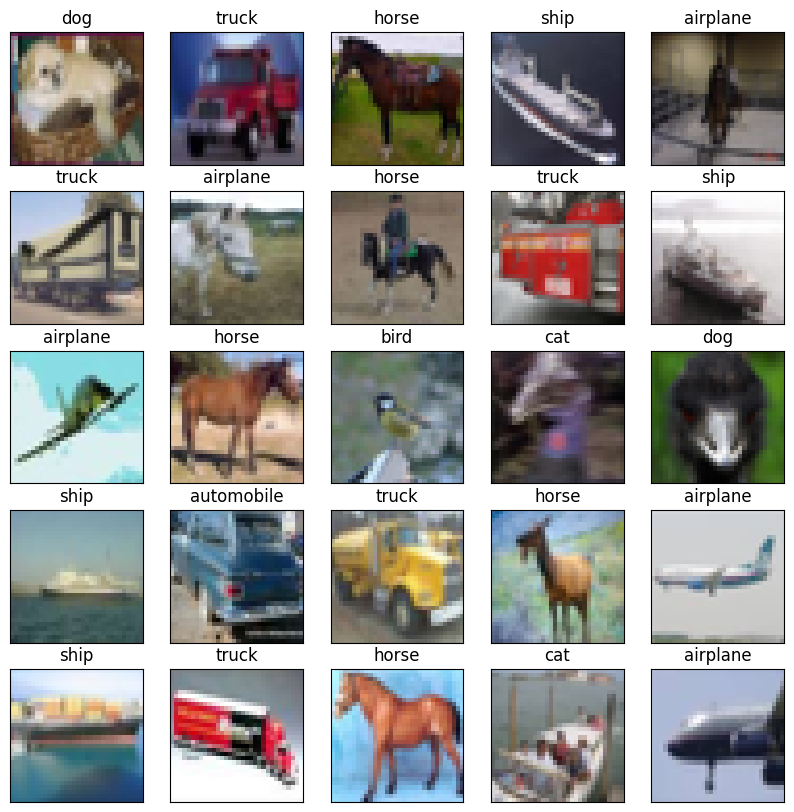

In [17]:
#학습된 모델로 예측
n_image = 25  #이미지의 표시 수
rand_idx = np.random.randint(0, len(x_test), n_image)  #난수

y_rand = model.predict(x_test[rand_idx])  #랜덤인 이미지를 입력으로서 예측
predicted_class = np.argmax(y_rand, axis=1)

plt.figure(figsize=(10,10))  #이미지의 표시 크기
for i in range(n_image):
  cifar_img=plt.subplot(5, 5, i+1)
  plt.imshow(x_test[rand_idx[i]])
  label = cifar10_labels[predicted_class[i]]  #라벨명 취득
  plt.title(label)
  plt.tick_params(labelbottom=False, labelleft=False, bottom=False, left=False)
plt.show()